# What inside

**1 Objective**<br>
**2 Library**<br>
**3 Data Inspection**<br>
**4 Exploratory Data Analysis**<br>
**5 Model Building**<br>
**6 Model Evaluation**<br>

# 1 Objective

there are different platforms of marketing we are going to make a model which can predict sales based on money spent on diffrent platforms.

# 2 Library

In [130]:
import warnings 
warnings.filterwarnings("ignore")
#for explore data and calculation purpose
import numpy as np 
import pandas as pd 
# Data visualization  
import matplotlib.pyplot as plt
import seaborn as sns


# 3 Data incpection

In [131]:
df = pd.read_csv(r"E:\github material\Linear Regression\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [132]:
df.shape

(200, 4)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [134]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning

In [135]:
#checking null value
df.isnull().sum()
#Good no null value present

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

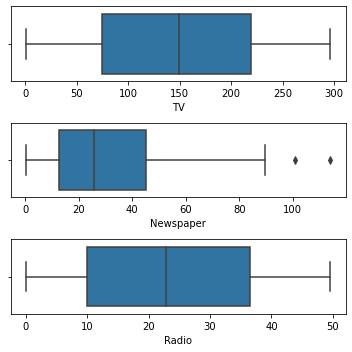

In [136]:
#Lets  check the outlier 
fig ,axs = plt.subplots(3 , figsize =(5,5))
f1 = sns.boxplot(df['TV'] ,ax= axs[0])
f2 = sns.boxplot(df['Newspaper'] ,ax=axs[1])
f3 = sns.boxplot(df['Radio'], ax=axs[2])
plt.tight_layout()

In [137]:
#ther are no considerable outliers present in the data.

# 4. Exploratory Data Analysis

**Sales(Target Variable)**

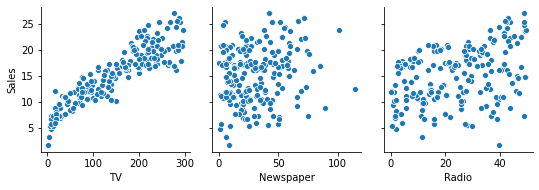

In [138]:
sns.pairplot(df , x_vars= ['TV', 'Newspaper', 'Radio'], y_vars=['Sales'])

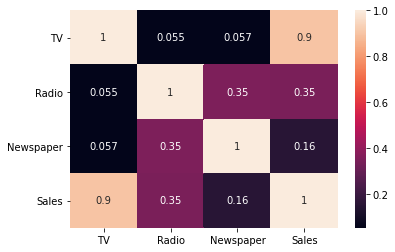

In [139]:
# Plot a heatmap to see correlation
sns.heatmap(df.corr(),annot =True)

Clear observation from pairplot and heat map that TV is more effective its have very high positive correlation bitween sales and TV


# Model building

### Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 +......+ m_nx_n$
- $y$ is the response 
- $c$ is the intercept
- $m_1$ is the coefficient for the first feature 
- $m_n$ is the coefficient for  the nth feature <br>

In our case:<br>
$y = c +m_1 \times TV $

The $m$ values are called the model **coefficients** or **model parameters**.


In [140]:
### Steps in model building using 'statsmodels'

In [143]:
X = df.drop("Sales" ,axis=1)   # feature variable 
y =df['Sales']# target variable

In [144]:
#Train - Test split

In [145]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(X,y,test_size=.20)

In [147]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [148]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [167]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [165]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# 6.Model evaluation

In [166]:
lr.params

const        4.788265
TV           0.053810
Radio        0.097249
Newspaper    0.002946
dtype: float64

In [169]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     410.2
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           9.19e-74
Time:                        19:19:28   Log-Likelihood:                -309.88
No. Observations:                 160   AIC:                             627.8
Df Residuals:                     156   BIC:                             640.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7883      0.358     13.368      0.0

observe some value
1. The coefficient and significance (p-values)
2. R-squared
3. F statistics and its significance

The coefficient for TV is 0.0538(p<.05)<br>
The coefficient for Radio is 0.0972(p<.05)<br>
The coefficient for Newspaper is 0.0029(p>.654)<br>
We can say Newspaper plays a less importent role in sales compare to TV and Radio

$2.$  R - squared is 0.888
it means 88.8% of the variance in sales can be explained by these    three mode of advertisement

$3.$ F statistics has a very low p value(practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

Linear regression equation becomes 

$Sales = 4.7883 + 0.0538 \times TV + 0.0972 \times Radio + 0.0029 \times Newspaper$

In [172]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

Distribution of the error terms<br>
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

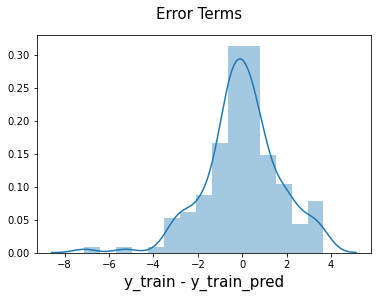

In [173]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

**Predictions on the Test set**

In [175]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [176]:
y_pred.head()

153    17.977683
17     23.945722
15     20.097259
139    19.011897
1      11.137512
dtype: float64

In [177]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [178]:
#Looking at the RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

1.549667892903923

In [180]:
#checking R-squared on test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.9352379428781739